<a href="https://colab.research.google.com/github/SUVETHA-31/SUVETHA/blob/main/Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries



In [ ]:
train_df = pd.read_csv('Accident_Severity_train.csv')
print(train_df.head())

   Accident_ID    Date_and_Time   Latitude  Longitude Road_Type  \
0        17816   1/12/2021 7:00  12.874465  77.541552     Rural   
1        18371   2/4/2021 10:00  13.021372  77.534580     Rural   
2         1380  2/27/2019 11:00  13.006026  77.720822     Rural   
3        14764    9/7/2020 3:00  12.953451  77.495008     Urban   
4         7347   11/3/2019 2:00  12.967386  77.574066   Highway   

  Surface_Conditions Lighting_Conditions Traffic_Control Accident_Type  \
0                Wet            Daylight              No   Hit and Run   
1                Dry          Street-lit             Yes     Collision   
2                Dry            Daylight             Yes     Collision   
3                Icy          Street-lit             Yes   Hit and Run   
4                Dry          Street-lit              No   Hit and Run   

   Vehicles_Involved  ...  Lane_Count Intersection_Proximity  \
0                NaN  ...           1             627.164025   
1                1.0  ..

In [ ]:
test_df = pd.read_csv("/content/Accident_Severity_test.csv")
print(test_df.head())

   Accident_ID     Date_and_Time   Latitude  Longitude Road_Type  \
0        19134     3/8/2021 6:00  12.925399  77.513038     Urban   
1         4981   7/27/2019 13:00  12.907859  77.561764     Rural   
2        16643  11/24/2020 11:00  12.978122  77.498510   Highway   
3        19117    3/7/2021 13:00  12.890414  77.540677     Rural   
4         5306    8/10/2019 2:00  12.973555  77.643933   Highway   

  Surface_Conditions Lighting_Conditions Traffic_Control Accident_Type  \
0                Wet            Darkness             Yes   Hit and Run   
1                Wet            Daylight             Yes      Rollover   
2                Dry          Street-lit             Yes      Rollover   
3                Wet            Daylight             Yes      Rollover   
4                Icy            Daylight             Yes     Collision   

   Vehicles_Involved  ...  Road_Width Lane_Count Intersection_Proximity  \
0                4.0  ...    8.442628          2             866.828262

Exploratory Data Analysis

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 49 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Accident_ID                       16000 non-null  int64  
 1   Date_and_Time                     16000 non-null  object 
 2   Latitude                          16000 non-null  float64
 3   Longitude                         16000 non-null  float64
 4   Road_Type                         16000 non-null  object 
 5   Surface_Conditions                16000 non-null  object 
 6   Lighting_Conditions               16000 non-null  object 
 7   Traffic_Control                   16000 non-null  object 
 8   Accident_Type                     16000 non-null  object 
 9   Vehicles_Involved                 14412 non-null  float64
 10  Pedestrians_Involved              16000 non-null  int64  
 11  Day_of_Week                       16000 non-null  object 
 12  Time

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Accident_ID                       4000 non-null   int64  
 1   Date_and_Time                     4000 non-null   object 
 2   Latitude                          4000 non-null   float64
 3   Longitude                         4000 non-null   float64
 4   Road_Type                         4000 non-null   object 
 5   Surface_Conditions                4000 non-null   object 
 6   Lighting_Conditions               4000 non-null   object 
 7   Traffic_Control                   4000 non-null   object 
 8   Accident_Type                     4000 non-null   object 
 9   Vehicles_Involved                 3588 non-null   float64
 10  Pedestrians_Involved              4000 non-null   int64  
 11  Day_of_Week                       4000 non-null   object 
 12  Time_o

In [ ]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [ ]:
train_df.describe()

,Accident_ID,Latitude,Longitude,Vehicles_Involved,Pedestrians_Involved,Temperature,Humidity,Wind_Speed,Precipitation,Visibility,...,Traffic_Signals,Proximity_to_School,Proximity_to_Hospital,Proximity_to_Shopping_Center,Road_Width,Lane_Count,Intersection_Proximity,Population_Density,Street_Lighting_Proximity,Accident_Occurred
count,16000.000000,16000.000000,16000.000000,14412.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,...,16000.000000,16000.000000,14412.000000,16000.000000,14412.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.0
mean,9990.603000,12.980247,77.614854,2.503192,0.995062,18.714875,81.066765,9.977645,7.232252,3.357112,...,4.484813,2506.624825,2506.799945,2496.415962,6.493860,2.491062,497.144724,5480.209108,251.385351,1.0
std,5774.763363,0.080734,0.071892,1.122342,0.812145,10.905158,11.995843,7.306718,12.960709,3.065771,...,2.856664,1446.483976,1447.257314,1438.984053,2.010786,1.119039,289.475860,2606.955182,143.553501,0.0
min,1.000000,12.840003,77.490001,1.000000,0.000000,0.001523,50.374846,0.000593,0.000000,0.100204,...,0.000000,0.030268,0.212595,0.218385,3.000220,1.000000,0.083679,1000.370220,0.019677,1.0
25%,4973.750000,12.910348,77.552696,1.000000,0.000000,10.026355,72.307999,4.065952,0.000000,0.650398,...,2.000000,1254.045747,1248.913193,1254.393517,4.758537,1.000000,243.934476,3196.955729,127.115878,1.0
50%,9993.000000,12.980537,77.615099,2.000000,1.000000,17.721185,81.904193,8.340332,0.000000,2.325283,...,5.000000,2506.248829,2507.802948,2491.793574,6.500469,2.000000,497.165100,5493.825236,251.897213,1.0
75%,14977.250000,13.050261,77.676359,4.000000,2.000000,27.417643,90.388350,15.001288,10.874986,5.831708,...,7.000000,3760.701176,3773.879337,3733.780518,8.220249,3.000000,747.600750,7743.031385,375.136453,1.0
max,20000.000000,13.119964,77.739947,4.000000,2.000000,39.999915,100.000000,29.999439,49.982958,9.999043,...,9.000000,4999.307295,4999.968702,4999.896390,9.998700,4.000000,999.971459,9996.559598,499.991544,1.0


In [ ]:
test_df.describe()

,Accident_ID,Latitude,Longitude,Vehicles_Involved,Pedestrians_Involved,Temperature,Humidity,Wind_Speed,Precipitation,Visibility,...,Traffic_Signals,Proximity_to_School,Proximity_to_Hospital,Proximity_to_Shopping_Center,Road_Width,Lane_Count,Intersection_Proximity,Population_Density,Street_Lighting_Proximity,Accident_Occurred
count,4000.000000,4000.000000,4000.000000,3588.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,3588.000000,4000.000000,3588.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.0
mean,10039.088000,12.978096,77.614810,2.505853,1.004750,18.983879,80.825349,9.978503,7.253969,3.362394,...,4.591250,2459.290186,2471.182344,2513.435256,6.532268,2.50475,493.811176,5491.487712,247.637486,1.0
std,5769.731282,0.080955,0.072289,1.120914,0.823041,10.928028,12.149569,7.330514,12.859215,3.029827,...,2.900134,1456.661462,1448.741788,1444.970780,2.053277,1.12463,286.714803,2599.663441,146.710887,0.0
min,8.000000,12.840064,77.490024,1.000000,0.000000,0.004517,50.157159,0.002031,0.000000,0.101396,...,0.000000,0.898648,1.376923,0.034684,3.001229,1.00000,0.061264,1007.264385,0.080317,1.0
25%,5112.250000,12.908316,77.552134,1.750000,0.000000,10.471456,72.244179,4.050213,0.000000,0.672987,...,2.000000,1170.199245,1192.795100,1243.455287,4.743083,1.00000,244.773525,3262.872466,118.656636,1.0
50%,10029.000000,12.977213,77.615948,3.000000,1.000000,17.695473,81.505723,8.409403,0.000000,2.403288,...,5.000000,2459.342002,2452.324514,2532.310032,6.578129,3.00000,488.031546,5478.517144,246.683983,1.0
75%,15101.250000,13.047750,77.677063,4.000000,2.000000,28.028210,90.388542,14.956689,11.009747,5.817904,...,7.000000,3724.567260,3713.704657,3749.995138,8.336788,4.00000,736.424080,7743.634565,375.381522,1.0
max,19989.000000,13.119979,77.739975,4.000000,2.000000,39.984562,100.000000,29.957192,49.962854,9.997129,...,9.000000,4996.771475,4999.316176,4999.868077,9.999540,4.00000,999.606468,9988.763443,499.889921,1.0


In [ ]:
train_df.shape

(16000, 49)

In [ ]:
test_df.shape

(4000, 48)

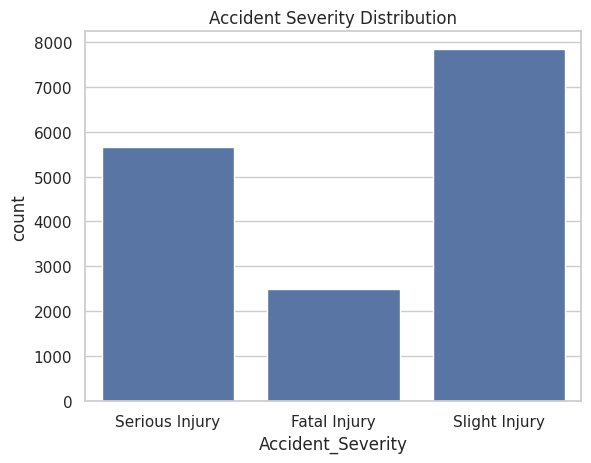

In [ ]:
sns.countplot(x='Accident_Severity', data=train_df)
plt.title('Accident Severity Distribution')
plt.show()

In [ ]:
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].mean())



correlation heatmap

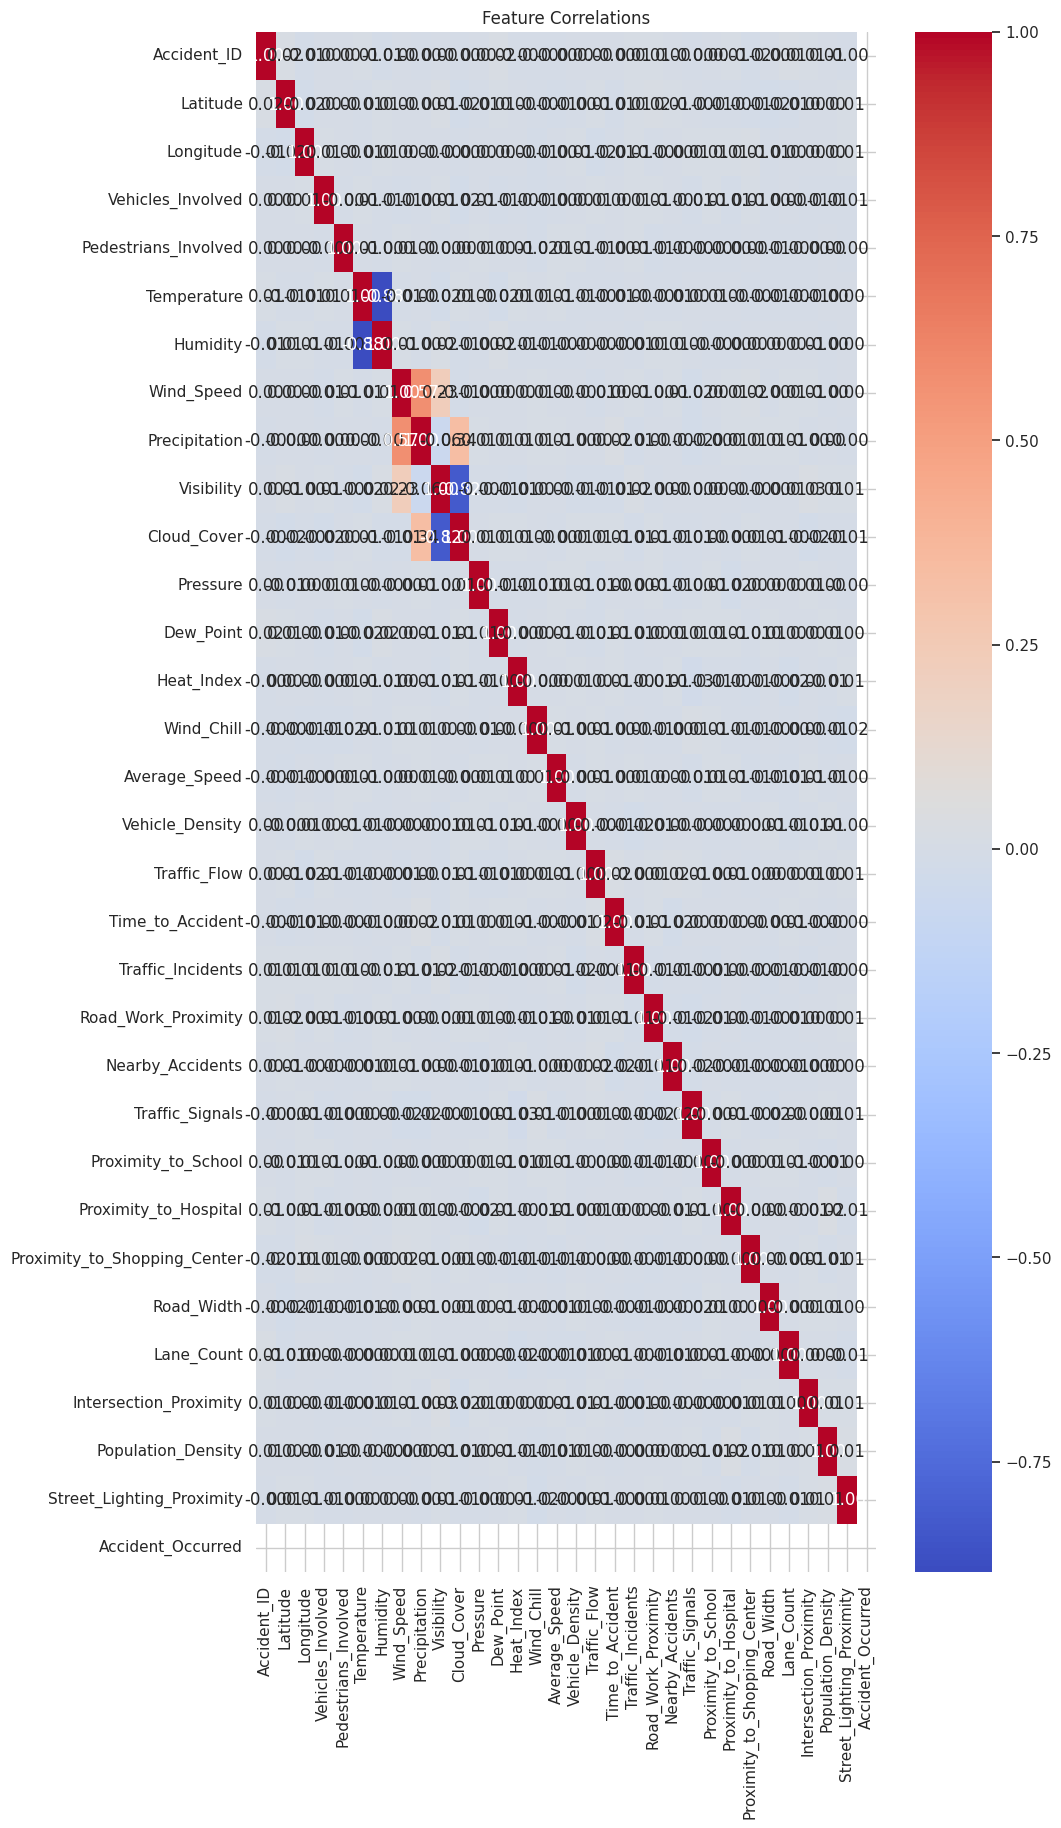

In [ ]:
plt.figure(figsize=(10, 20))
sns.heatmap(train_df[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt='.2f')
plt.title('Feature Correlations')
plt.show()

label_encoding for train data

In [ ]:
from sklearn import preprocessing

for col in train_df.select_dtypes(include=['object']).columns:
 label_encoder=preprocessing.LabelEncoder()

 label_encoder.fit(train_df[col].unique())

 train_df[col]=label_encoder.transform(train_df[col])

 print(f"{col}: {train_df[col].unique()}")

Date_and_Time: [ 231 6634 6397 ... 5681 7953 9439]
Road_Type: [1 2 0]
Surface_Conditions: [2 0 1]
Lighting_Conditions: [1 2 0]
Traffic_Control: [0 1]
Accident_Type: [1 0 2]
Day_of_Week: [5 4 6 1 3 2 0]
Time_of_Day: [0 3 1 2]
Weather_Conditions: [1 0 3 2]
Weather_Type: [1 2 0 3]
Congestion_Level: [2 0 1]
Peak_Hour: [1 0]
Bicycle_Lane_Availability: [0 1]
Pedestrian_Crossing_Availability: [0 1]
Driver_Education_Level: [1 4 2 3 5 0]
Is_Weekend: [0 1]
Accident_Severity: [1 0 2]


label_encoding for test data

In [ ]:
from sklearn import preprocessing
for col in test_df.select_dtypes(include=['object']).columns:
 label_encoder=preprocessing.LabelEncoder()

 label_encoder.fit(test_df[col].unique())

 test_df[col]=label_encoder.transform(test_df[col])

 print(f"{col}: {test_df[col].unique()}")

Date_and_Time: [2198 3290  907 ... 1438 3613    8]
Road_Type: [2 1 0]
Surface_Conditions: [2 0 1]
Lighting_Conditions: [0 1 2]
Traffic_Control: [1 0]
Accident_Type: [1 2 0]
Day_of_Week: [1 2 5 3 4 0 6]
Time_of_Day: [1 3 0 2]
Weather_Conditions: [2 1 3 0]
Weather_Type: [3 1 0 2]
Congestion_Level: [2 1 0]
Peak_Hour: [1 0]
Bicycle_Lane_Availability: [1 0]
Pedestrian_Crossing_Availability: [1 0]
Driver_Education_Level: [2 4 1 0 3 5]
Is_Weekend: [0 1]


In [ ]:
train_df.fillna(train_df.mean(), inplace=True)

scaler = StandardScaler()
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.drop('Accident_Severity')

train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])


In [ ]:
X=train_df.drop(['Accident_Severity'],axis=1)
Y=train_df['Accident_Severity']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

 model: 1 logistic regression




MODEL1: 0.498125
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       484
           1       0.38      0.04      0.08      1117
           2       0.50      0.97      0.66      1599

    accuracy                           0.50      3200
   macro avg       0.29      0.34      0.25      3200
weighted avg       0.38      0.50      0.36      3200

F1 Score (Logistic Regression): 0.35709273891732674
Logistic Regression Classification Report: 


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


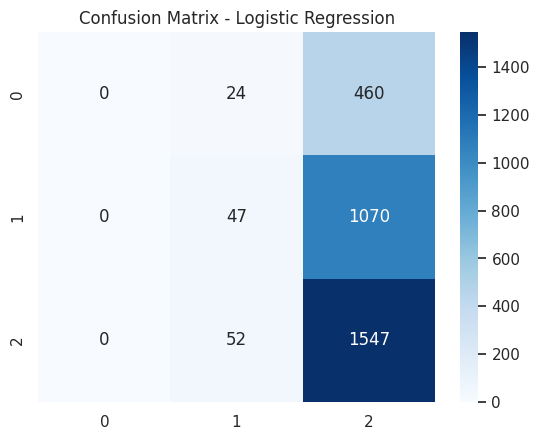

In [ ]:
from sklearn.metrics import accuracy_score

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


y_pred_log = log_reg.predict(X_val)

accuracy_rf = accuracy_score(y_val, y_pred_log)
print("MODEL1:", accuracy_rf)

print(classification_report(y_val, y_pred_log))
print(f"F1 Score (Logistic Regression): {f1_score(y_val, y_pred_log, average='weighted')}")
print("Logistic Regression Classification Report: ")


sns.heatmap(confusion_matrix(y_val, y_pred_log), annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Model 2: Decision Tree Classifier

MODEL2: 0.4103125
              precision    recall  f1-score   support

           0       0.19      0.20      0.20       484
           1       0.36      0.37      0.36      1117
           2       0.53      0.50      0.51      1599

    accuracy                           0.41      3200
   macro avg       0.36      0.36      0.36      3200
weighted avg       0.42      0.41      0.41      3200

F1 Score (Decision Tree): 0.41364805836207424
Decision Tree Classification Report: 


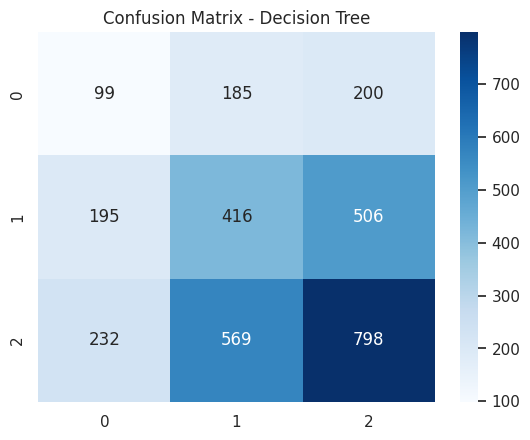

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred_tree = decision_tree.predict(X_val)

accuracy_rf_2 = accuracy_score(y_val, y_pred_tree)
print("MODEL2:", accuracy_rf_2)

print(classification_report(y_val, y_pred_tree))
print(f"F1 Score (Decision Tree): {f1_score(y_val, y_pred_tree, average='weighted')}")
print("Decision Tree Classification Report: ")

sns.heatmap(confusion_matrix(y_val, y_pred_tree), annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix - Decision Tree')
plt.show()

Model 3: Random Forest Classifier

MODEL3: 0.485
              precision    recall  f1-score   support

           0       0.33      0.00      0.00       484
           1       0.37      0.18      0.24      1117
           2       0.51      0.85      0.63      1599

    accuracy                           0.48      3200
   macro avg       0.40      0.34      0.29      3200
weighted avg       0.43      0.48      0.40      3200

F1 Score (Random Forest): 0.40103513519226575
Random Forest Classification Report: 


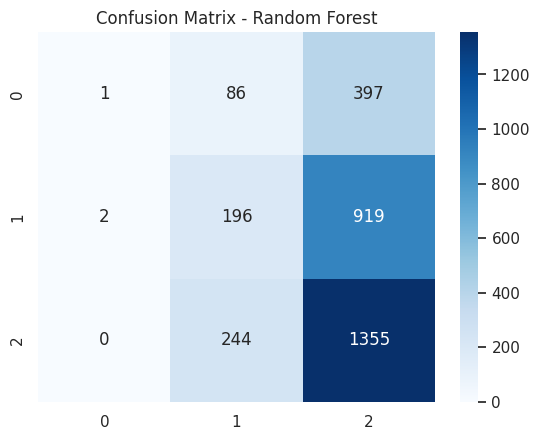

In [ ]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)


y_pred_rf = random_forest.predict(X_val)
accuracy_rf_3 = accuracy_score(y_val, y_pred_rf)
print("MODEL3:", accuracy_rf_3)

print(classification_report(y_val, y_pred_rf))
print(f"F1 Score (Random Forest): {f1_score(y_val, y_pred_rf, average='weighted')}")
print("Random Forest Classification Report: ")

sns.heatmap(confusion_matrix(y_val, y_pred_rf), annot=True, fmt='d', cmap="Blues")
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [ ]:
y_pred_test_rf = random_forest.predict(test_df)


if 'Accident_Index' in test_df.columns:
  submission_df = pd.DataFrame({'Accident_Index': test_df['Accident_Index'],
                                'Accident_Severity': y_pred_test_rf})
else:

  submission_df = pd.DataFrame({'Accident_Index': range(len(y_pred_test_rf)),
                                'Accident_Severity': y_pred_test_rf})
submission_df.to_csv('submission_random_forest.csv', index=False)

print(submission_df)

print("Predictions on test data generated and saved to submission_random_forest.csv")

      Accident_Index  Accident_Severity
0                  0                  2
1                  1                  1
2                  2                  1
3                  3                  2
4                  4                  1
...              ...                ...
3995            3995                  2
3996            3996                  2
3997            3997                  1
3998            3998                  1
3999            3999                  2

[4000 rows x 2 columns]
Predictions on test data generated and saved to submission_random_forest.csv


In [ ]:
models = {
    'Logistic Regression':49,
    'Decision Tree':41 ,
    'Random Forest': 48
}
sns.set(style="whitegrid")

model_names = list(models.keys())
accuracies = list(models.values())

<ipython-input-51-f62787ec7e57>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accuracies, y=model_names, palette="viridis")
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 l

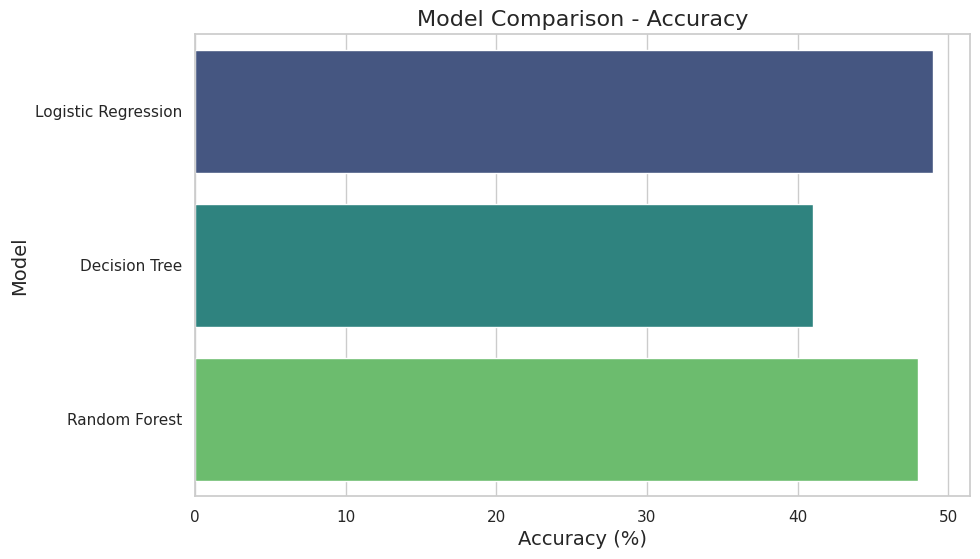

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=accuracies, y=model_names, palette="viridis")


plt.title("Model Comparison - Accuracy", fontsize=16)
plt.xlabel("Accuracy (%)", fontsize=14)
plt.ylabel("Model", fontsize=14)
plt.show()